In [1]:
import pandas as pd
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
# Load data + pull out images and lables
labeled_images = pd.read_csv("./data/digits-recognizer/train.csv")



In [43]:
# Pull data only for images of number 1 and 2 (our classifier support 2-class classification
labeled_images_of_one = labeled_images.loc[labeled_images['label'] == 1][:1000]
labeled_images_of_two = labeled_images.loc[labeled_images['label'] == 2][:1000]

limited_labeled_images = pd.concat([labeled_images_of_one, labeled_images_of_two])

images = limited_labeled_images.iloc[:, 1:]
labels = limited_labeled_images.iloc[:, :1]

In [44]:
limited_labeled_images

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# Split data into train and test datasets
train_images, test_images, train_labels, test_labels = \
    train_test_split(images, labels, train_size=0.8, random_state=0)

Text(0.5,1,u'1')

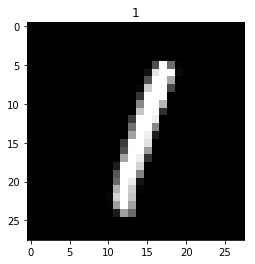

In [46]:
# Viewing an image
i = -1  # image index 
img = train_images.iloc[i].as_matrix()  # transform one-dimention image into a 1-d numpy array
img = img.reshape((28, 28))  # reshape numpy 1d array inti 2d 28x28 array
plt.imshow(img, cmap='gray')
plt.title(train_labels.iloc[i, 0])  # Put the image a title by it's label


(array([711.,   4.,   5.,   4.,   4.,   3.,   8.,   4.,   5.,  36.]),
 array([  0. ,  25.4,  50.8,  76.2, 101.6, 127. , 152.4, 177.8, 203.2,
        228.6, 254. ]),
 <a list of 10 Patch objects>)

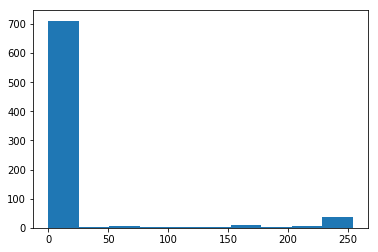

In [47]:
# in order to understand the image we can plot the histogram of our possible pixel values
plt.hist(train_images.iloc[i])
# we can see that our pixels not really with values of 1 and 0, and it might have affect
# on our model.

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5,1,u'label    1\nName: 1505, dtype: int64')

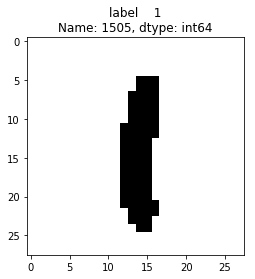

In [48]:
# Our images are white digits on black background, now we'll try to change the background
# to white and the digits to black so the digits (pixels) will be easier to detect
i = 1
# TODO: what is the syntax of x > 0 -> 1 means?
test_images[test_images > 0] = 1
train_images[train_images > 0] = 1

img = train_images.iloc[i].as_matrix().reshape((28, 28))
plt.imshow(img, cmap='binary')
plt.title(train_labels.iloc[i])


(array([706.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  78.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

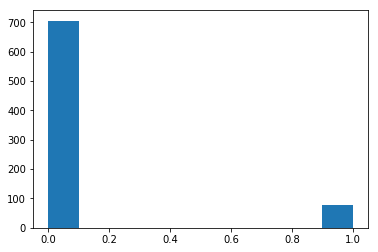

In [49]:
# now after we changed the colors and removed our gray area of pixels we can plot the image's
# color histogram again
plt.hist(train_images.iloc[i])
# now we can see that all the pixels are with values of 1 and 0

In [54]:
train_labels.values.ravel().size


1600

In [55]:
# Train our model
from sklearn.metrics import accuracy_score

from lib.models.svm import SVM

clf = SVM()
clf.fit(train_images.values, train_labels.values.ravel())
accuracy = accuracy_score(clf.predict(test_images), test_labels.ravel())

print "accuracy: {}".format(accuracy)